# Predicting Employee Productivity Using Tree Models

#### Table of Contents
* [Introduction](#1)
* [Import Libraries](#2)
* [Load Database](#3)
* [Exploratory Data Analysis](#4)
* [Feature Selection](#5)
* [Preprocessing the Data for Modelling](#6)
* [Build and Train Model](#7)
* [Tree Visualization](#8)
* [Evaluating our Tree Model](#9)
* [Cross Validation](#10)
* [Cost Complexity Pruning](#11)
* [Hyperparameter Optimization](#12)
* [Random Forest Model](#13)
* [Conclusion](#14)

#### Introduction <a class='anchor' id='1'></a>

In this project, the objective is to predict employee productivity using decision trees and random forest modeling. The dataset we will be using is the Productivity Prediction of Garment Employees from the UCI Machine Learning Repository. 

The following is the dataset's official column information:

- <span style='background :black'>date:</span> date in MM-DD-YYYY
- <span style='background :black'>quarter:</span> a portion of the month — month was divided into four quarters
- <span style='background :black'>department:</span> associated department with the instance
- <span style='background :black'>day:</span> day of the week
- <span style='background :black'>team:</span> associated team number with the instance
- <span style='background :black'>targeted_productivity:</span> targeted productivity set by the authority for each team for each day
- <span style='background :black'>smv:</span> standard minute value — the allocated time for a task
- <span style='background :black'>wip:</span> work in progress — includes the number of unfinished items for products
- <span style='background :black'>over_time:</span> represents the amount of overtime by each team in minutes
- <span style='background :black'>incentive:</span> represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
- <span style='background :black'>idle_time:</span> the duration of time when the production was interrupted due to several reasons
- <span style='background :black'>idle_men:</span> the number of workers who were idle due to production interruption
- <span style='background :black'>no_of_style_change:</span> number of changes in the style of a particular product
- <span style='background :black'>no_of_workers:</span> number of workers on each team
- <span style='background :black'>actual_productivity:</span> the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

#### Import Libraries <a class='anchor' id='2'></a>

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier

#### Load Database <a class='anchor' id='3'></a>

In [71]:
df = pd.read_csv("D:/DataQuest/garments_worker_productivity.csv")

In [72]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


#### Exploratory Data Analysis <a class='anchor' id='4'></a>

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

There are 1197 rows x 15 columns. 
wip only has 691 non-null values. We will have a look at it.

In [74]:
df['wip'].isnull().sum()

506

Looks like there are 506 null values.

In [75]:
df[df['wip'].isnull()].sample(5) #Look at sample of rows with NaN for wip

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
773,2/15/2015,Quarter3,finishing,Sunday,11,0.6,2.90,NaN,1200,0,0.0,0,0,10.0,0.715333
1098,3/7/2015,Quarter1,finishing,Saturday,1,0.7,3.94,NaN,960,0,0.0,0,0,8.0,0.664875
1044,3/3/2015,Quarter1,finishing,Tuesday,5,0.7,4.60,NaN,3360,0,0.0,0,0,8.0,0.354444
819,2/17/2015,Quarter3,finishing,Tuesday,9,0.8,3.94,NaN,960,0,0.0,0,0,8.0,0.586042
465,1/27/2015,Quarter4,finishing,Tuesday,12,0.7,4.15,NaN,1080,0,0.0,0,0,9.0,0.823556


Date is in string format. We also have quarter, department, and day in string format.

In [76]:
print(df['date'].head())
print(df['date'].tail())

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object
1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object


It looks like the data only goes from Jan to Mar.

In [77]:
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

A tad strange to have five quarters. Looking at the description, we find that quarter is supposedly divided into four quarters of a month. Not our usual usage of quarters in a year.

In [78]:
df['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

There is no 'Friday' category. This may or may not be an error.

In [79]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

It looks like there is a problem with the department column. There are two finishing categories.

In [80]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

There is an extra space after finishing. We will clean this later.

Let's look at the numerica data.

In [81]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


We see that actual_productivity maximum is actually higher than 1.

In [82]:
df['actual_productivity'].value_counts()

actual_productivity
0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: count, Length: 879, dtype: int64

In [83]:
df[df['actual_productivity']>1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


It seems we have quite a number of rows with actual_productivity > 1.

In [84]:
df['idle_time'].value_counts()

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64

In [85]:
df['idle_men'].value_counts()

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: count, dtype: int64

Most of idle_time and idle_men are 0 values.

#### Data Cleaning

Remove trailing space from department

In [86]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df["department"].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

Drop date column

In [87]:
#We won't be using date column in our model as it only included a short three month period and it should not contribute much to the predictive power of our model
df = df.drop('date',axis=1)

Merge Quarter5 with Quarter 4

In [88]:
#We will only use 4 quarters for our analysis. We will merge quarter5 with quarter4 since quarter5 only has a few observations.
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"

In [89]:
#We will also rename the quarters to just numbers
df.loc[df["quarter"] == "Quarter1", "quarter"] = 1
df.loc[df["quarter"] == "Quarter2", "quarter"] = 2
df.loc[df["quarter"] == "Quarter3", "quarter"] = 3
df.loc[df["quarter"] == "Quarter4", "quarter"] = 4
df["quarter"] = df["quarter"].astype("int")
df["quarter"].value_counts()

quarter
1    360
2    335
4    292
3    210
Name: count, dtype: int64

Drop idle_time and idle_men

In [90]:
df = df.drop(["idle_time", "idle_men"], axis = 1)

Drop wip - too many missing values and we cannot clean this properly without more information

In [91]:
df = df.drop('wip',axis=1)

Drop no_of_style_change - limited number of observations

In [92]:
df = df.drop("no_of_style_change", axis = 1)

No_of_workers should be int

In [93]:
df["no_of_workers"] = df["no_of_workers"].astype("int")


Also, "actual_productivity" should feature two decimals, just like "targeted_productivity".

In [94]:
df["actual_productivity"] = df["actual_productivity"].round(2)


The following step is crucial: since we are building a Classification Tree and not a Regression Tree, our target column "actual_productivity" must be categorical, not numerical.

To accomplish this, we will create a new column called "productive". It will feature boolean values indicating if the productivity targets were achieved for each observation in the dataset.

In [95]:
df['productive'] = df['actual_productivity'] >= df['targeted_productivity']
df['productive'] = df['productive'].astype(int)
df.sample(5)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
207,2,sweing,Monday,2,0.80,28.08,10530,63,58,0.80,1
574,1,finishing,Monday,8,0.65,4.15,960,0,8,0.56,0
1069,1,finishing,Thursday,2,0.60,3.90,960,0,8,0.95,1
45,1,sweing,Sunday,9,0.80,26.16,7080,60,59,0.85,1
1140,2,sweing,Monday,9,0.75,18.79,6240,45,52,0.75,1


In [141]:
df['productive'].value_counts()

productive
1.0    895
0.0    302
Name: count, dtype: int64

The minority class is about 25% of the whole dataset. This is a mild imbalance in the dataset, which may impact ability of our model to detect non-cases.

In [96]:
#Let's reorder the columns so they look nice
df = df[["quarter", "day", "department", "team", "no_of_workers", "targeted_productivity", 
        "actual_productivity", "productive", "over_time", "smv", "incentive"]]
df.head()

,quarter,day,department,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,sweing,8,59,0.80,0.94,1,7080,26.16,98
1,1,Thursday,finishing,1,8,0.75,0.89,1,960,3.94,0
2,1,Thursday,sweing,11,30,0.80,0.80,1,3660,11.41,50
3,1,Thursday,sweing,12,30,0.80,0.80,1,3660,11.41,50
4,1,Thursday,sweing,6,56,0.80,0.80,1,1920,25.90,50


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   int32  
 1   day                    1197 non-null   object 
 2   department             1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   no_of_workers          1197 non-null   int32  
 5   targeted_productivity  1197 non-null   float64
 6   actual_productivity    1197 non-null   float64
 7   productive             1197 non-null   int32  
 8   over_time              1197 non-null   int64  
 9   smv                    1197 non-null   float64
 10  incentive              1197 non-null   int64  
dtypes: float64(3), int32(3), int64(3), object(2)
memory usage: 89.0+ KB


#### Feature Selection <a class='anchor' id='5'></a>

Now that our data is cleaned, we can go into feature selection to find which features will be important for our tree model.

In [98]:
df.head()

,quarter,day,department,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,sweing,8,59,0.80,0.94,1,7080,26.16,98
1,1,Thursday,finishing,1,8,0.75,0.89,1,960,3.94,0
2,1,Thursday,sweing,11,30,0.80,0.80,1,3660,11.41,50
3,1,Thursday,sweing,12,30,0.80,0.80,1,3660,11.41,50
4,1,Thursday,sweing,6,56,0.80,0.80,1,1920,25.90,50


In [99]:
#Let's review what kind of data we have
categorical = ['quarter','department','day','team']
continuous = ['no_of_workers','targeted_productivity','over_time','smv','incentive']
#Our target would be actual_productivity and productive

Let's look at the categorical data first in relation to actual_productivity + productive (actual > targeted).

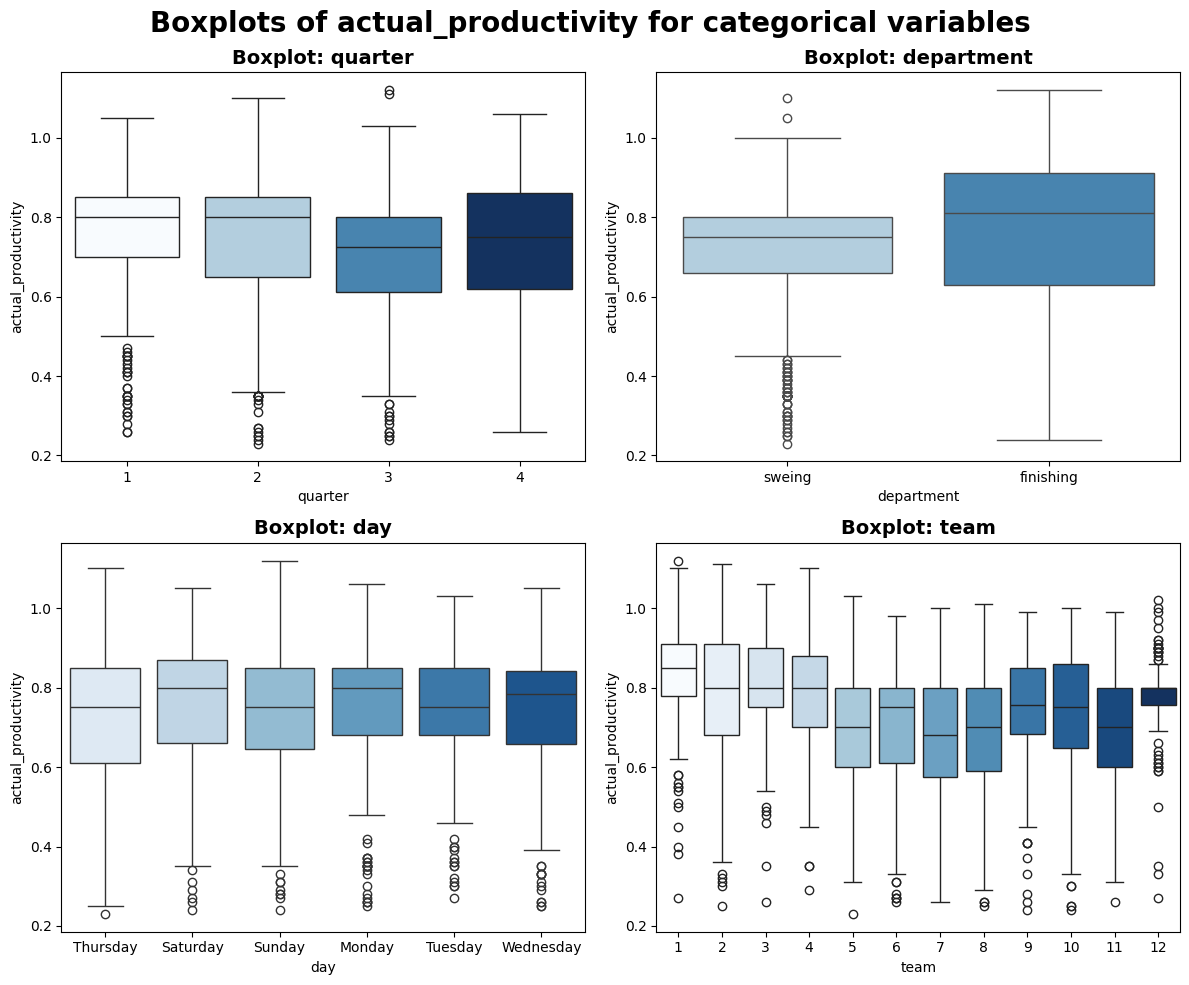

In [100]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax = ax.flatten()

fig.suptitle('Boxplots of actual_productivity for categorical variables ',
            fontsize=20, fontweight='bold')

for i, cat in enumerate(categorical):
    sns.boxplot(x=cat, y='actual_productivity', data=df, ax=ax[i], hue=cat, legend=False, palette='Blues')
    ax[i].set_title(f"Boxplot: {cat}", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

In general, the finishing department has higher productivity than the sewing department. There are no trends or patterns seen with quarter, day, or team.

Let us take a look at when actual_productivity is higher than targeted_productivity.

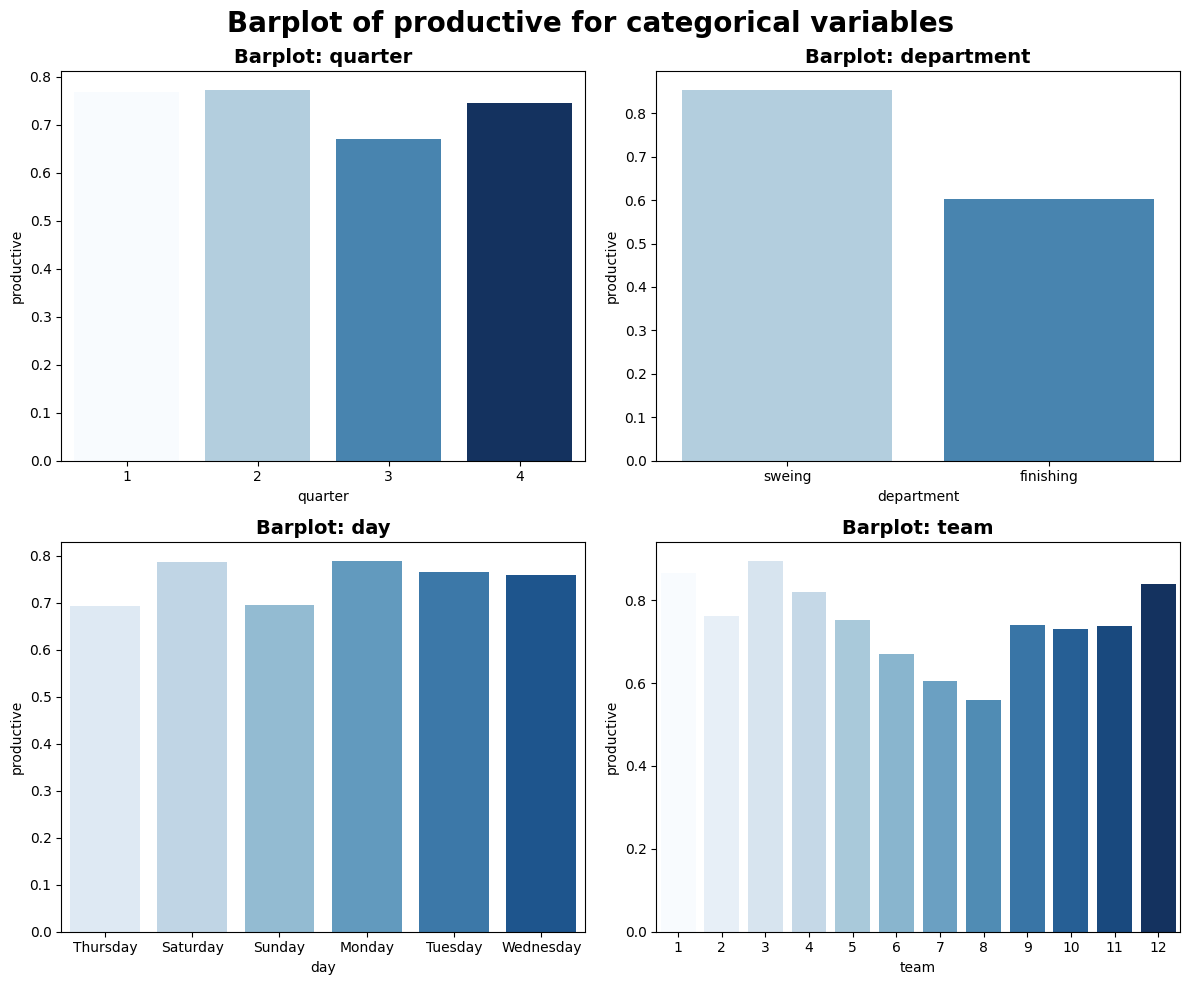

In [101]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax = ax.flatten()

fig.suptitle('Barplot of productive for categorical variables ',
            fontsize=20, fontweight='bold')

for i, cat in enumerate(categorical):
    sns.barplot(x=cat, y='productive', data=df, ax=ax[i], hue=cat, legend=False, palette='Blues', errorbar=None)
    ax[i].set_title(f"Barplot: {cat}", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Here we can see a more drastic difference between the sewing department vs the finishing department. Additionally, productivity seems lower during quarter 3.

Let's have a look at the continuous variables.

In [102]:
continuous = continuous + ['actual_productivity']

In [103]:
corr_matrix = df[continuous].corr()

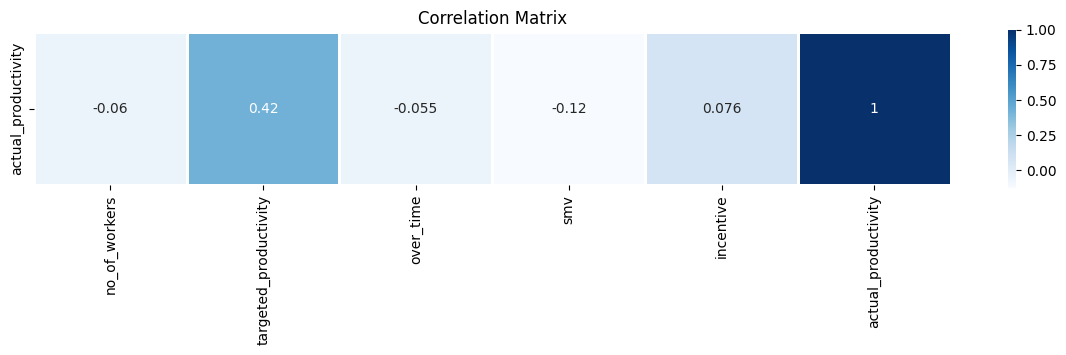

In [104]:
fig, ax = plt.subplots(figsize=(12,3))

sns.heatmap(
    corr_matrix.loc[['actual_productivity']],
    cmap='Blues',
    annot=True,
    ax=ax,
    linewidth = 1, 
    square =True,
)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

There doesn't seem to be any strong correlation between any of the predictors aside from targeted_productivity.

Let's have a look at the scatterplot to see if there are any other non-linear patterns.

In [105]:
continuous.remove('actual_productivity')
print(continuous)

['no_of_workers', 'targeted_productivity', 'over_time', 'smv', 'incentive']


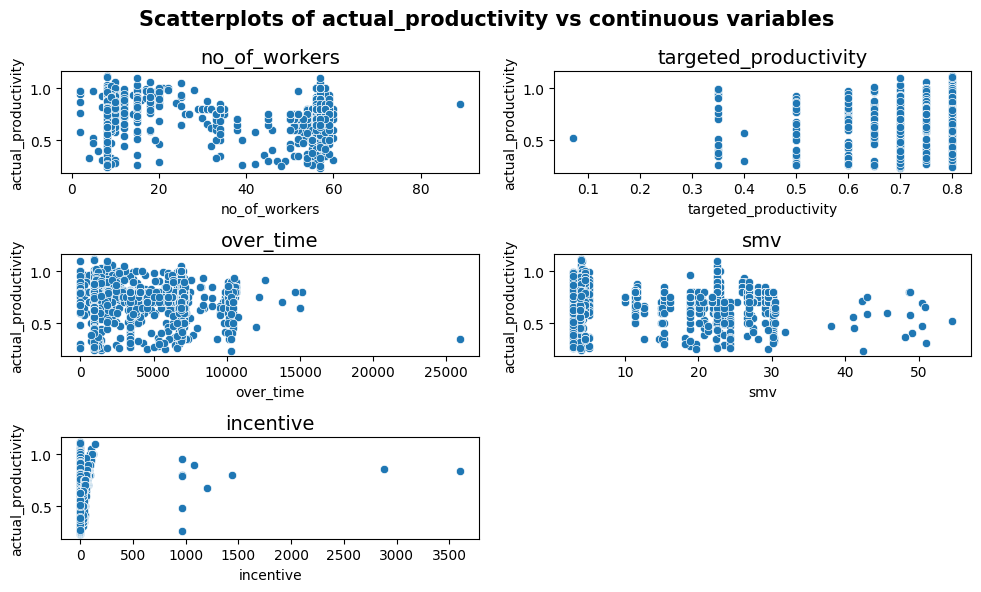

In [106]:
fig, ax = plt.subplots(3, 2, figsize=(10, 6))
ax = ax.flatten()

plt.suptitle("Scatterplots of actual_productivity vs continuous variables", fontsize=15, weight='bold')

for i, col in enumerate(continuous):
    sns.scatterplot(x=col, y='actual_productivity', data=df, ax=ax[i])
    ax[i].set_title(col, fontsize=14)
    
ax[5].axis('off')
plt.tight_layout()
plt.show()

None of the variables seem to exhibit any meaningful pattern to actual_productivity. It is interesting to note, however, that the higher the number of workers doesn't seem to correlate with better productivity as one would assume. Likewise, higher incentive does not seem to lead to higher productivity as well.

From our feature analysis and data exploration, it is not immediately clear which features should be selected for our model. There does not seem to be any clear correlation between the features and our target variable - actual_productivity. Feature selection may require input from consultants or industry experts.

In our initial model, we will keep all the predictors. 

#### Preprocessing the Data for Modelling <a class='anchor' id='6'></a>

This next part we will need to prepare our data for modelling. Specifically, we will need to convert our nominal data (quarter, day, department, and team) into dummy variables.

We will use the onehotencoder+make_column_transformer with scikit-learn to do this, but there is also pd.get_dummies method.

In [107]:
cat = ['quarter','day','department','team']

col_trans = make_column_transformer(
        (OneHotEncoder(), cat), 
        remainder = "passthrough", 
        verbose_feature_names_out = False
        )

onehot_df = col_trans.fit_transform(df)
df = pd.DataFrame(onehot_df, 
            columns = col_trans.get_feature_names_out())

df.head()

,quarter_1,quarter_2,quarter_3,quarter_4,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,...,team_10,team_11,team_12,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,59.0,0.80,0.94,1.0,7080.0,26.16,98.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.75,0.89,1.0,960.0,3.94,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,30.0,0.80,0.80,1.0,3660.0,11.41,50.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,30.0,0.80,0.80,1.0,3660.0,11.41,50.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,56.0,0.80,0.80,1.0,1920.0,25.90,50.0


In [108]:
df.columns

Index(['quarter_1', 'quarter_2', 'quarter_3', 'quarter_4', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'department_finishing', 'department_sweing', 'team_1',
       'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8',
       'team_9', 'team_10', 'team_11', 'team_12', 'no_of_workers',
       'targeted_productivity', 'actual_productivity', 'productive',
       'over_time', 'smv', 'incentive'],
      dtype='object')

#### Build and Train Model <a class='anchor' id='7'></a>

In [109]:
#Create Predictor / Target
X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]

In [110]:
# Dividing in training and test sets with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 24)
#We will use test_size = 0.2

In [111]:
# Instantiating and fitting the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)
#We will make a 3 level tree here
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

In [112]:
y_pred = tree.predict(X_test)

In [113]:
print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

Accuracy: 0.85


#### Tree Visualization <a class='anchor' id='8'></a>

In [114]:
tree.classes_

array([0., 1.])

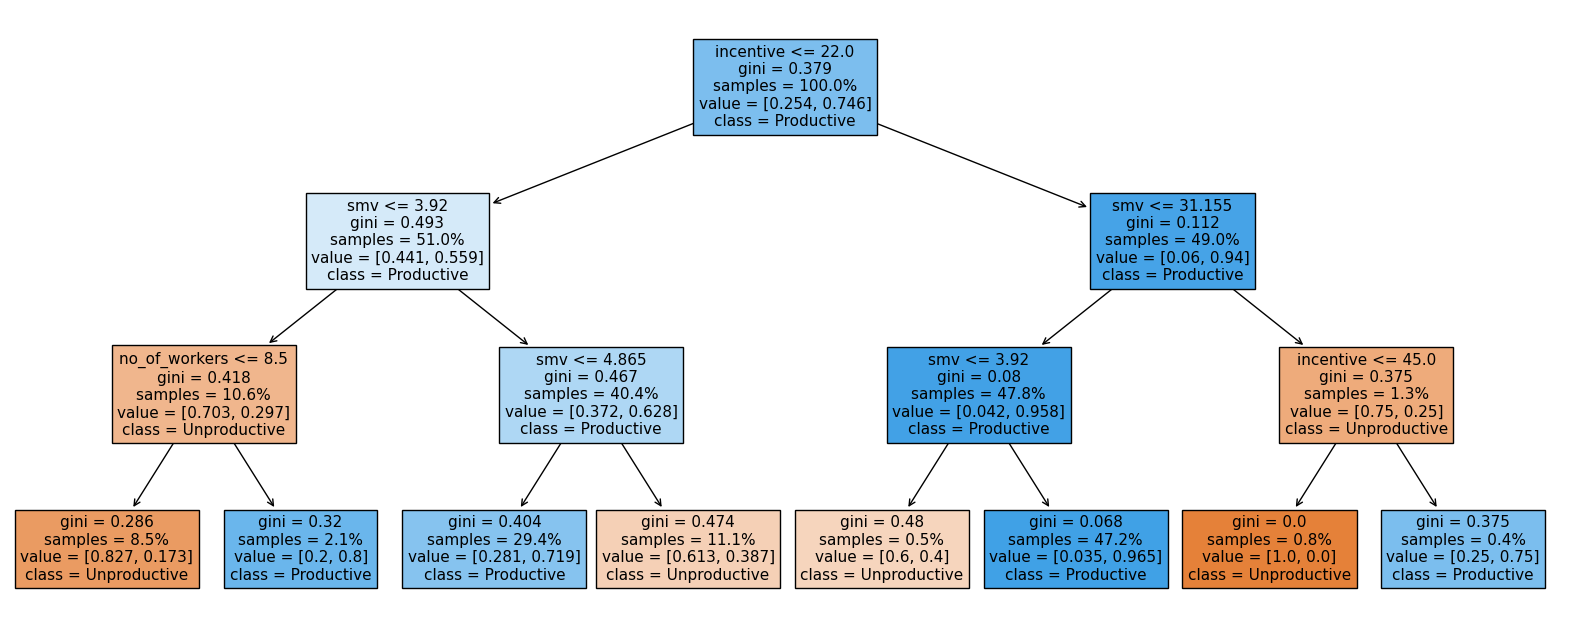

In [115]:
# Setting plot size

plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11)

Some observations:
- It appears that smv and incentives are more significant in dividing the data into homogenous leaves.
- Our largest sample is 47.2% with achieved productivity at 0.068 gini which is good!
- We have a gini 0 in a unproductive leaf but this represents only 0.8% of the sample.

We may want to explore the level of complexity to see if our model improves. However, before we do that, we want to evaluate our current tree model.

#### Evaluating our Tree Model <a class='anchor' id='9'></a>

First we will generate a confusion matrix.

In [116]:
confusion_matrix_tree = confusion_matrix(y_test, y_pred)
tn = confusion_matrix_tree[0, 0]  # True Negatives
fp = confusion_matrix_tree[0, 1]  # False Positives
tp = confusion_matrix_tree[1, 1]  # True Positives
fn = confusion_matrix_tree[1, 0]  # False Negatives
confusion_matrix_tree

array([[ 35,  24],
       [ 13, 168]], dtype=int64)

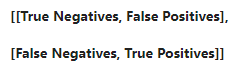

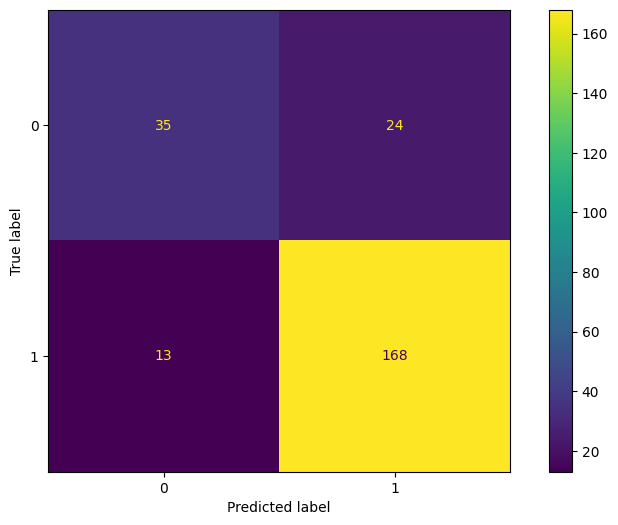

In [117]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_tree).plot()

In [118]:
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'True Positives: {tp}')
print(f'False Negatives: {fn}')

True Negatives: 35
False Positives: 24
True Positives: 168
False Negatives: 13


In [119]:
senstivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Senstivity on test data: {round(senstivity, 2)}')
print(f'Specificity on test data: {round(specificity, 2)}' )

Senstivity on test data: 0.93
Specificity on test data: 0.59


Our sensitivity, or recall, is very high! This means our model is good at picking up productive.

In [120]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.59      0.65        59
         1.0       0.88      0.93      0.90       181

    accuracy                           0.85       240
   macro avg       0.80      0.76      0.78       240
weighted avg       0.84      0.85      0.84       240



Our accuracy is 85% as we calculated before. Our weight precision (otherwise PPV) is 0.84.

#### Cross Validation <a class='anchor' id='10'></a>

We will further evaluate our model using cross validation.

First we evaluate using accuracy.

In [121]:
scores = cross_val_score(tree, X, y, cv = 10)
print("Cross Validation Accuracy Scores:", scores.round(2)) 

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]


In [122]:
print("Mean Cross Validation Score:", scores.mean().round(2))

Mean Cross Validation Score: 0.82


We also try evaluating with other scoring methods.

In [123]:
multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv = 10, 
                             scoring= ("precision", "recall", "f1") )

By test_precision

In [124]:
multiple_cross_scores["test_precision"].round(2)

array([0.86, 0.9 , 0.83, 0.85, 0.86, 0.87, 0.78, 0.85, 0.86, 0.87])

In [125]:
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))

Mean Cross Validated Precision: 0.85


By recall

In [126]:
multiple_cross_scores["test_recall"].round(2)

array([0.96, 0.94, 0.94, 1.  , 0.99, 0.9 , 0.85, 0.82, 0.94, 0.84])

In [127]:
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))

Mean Cross Validated Recall: 0.92


In [128]:
multiple_cross_scores["test_f1"].round(2)

array([0.91, 0.92, 0.88, 0.92, 0.92, 0.88, 0.82, 0.83, 0.9 , 0.86])

In [129]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated F1: 0.88


In [130]:
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated Precision: 0.85
Mean Cross Validated Recall: 0.92
Mean Cross Validated F1: 0.88


These metrics show our model is still pretty robust!

#### Cost Complexity Pruning <a class='anchor' id='11'></a>

Now, in our model we have chosen max depth level of 3 for simplicity sake. But how do we find the optimal level? This is where cost complexity pruning comes in. We start by building a full grown tree and we start pruning! After repeated prune and generate models, we also score them. Then, we pick the best one. However, this also means we need not just training, testing data sets. We also need a validation set.

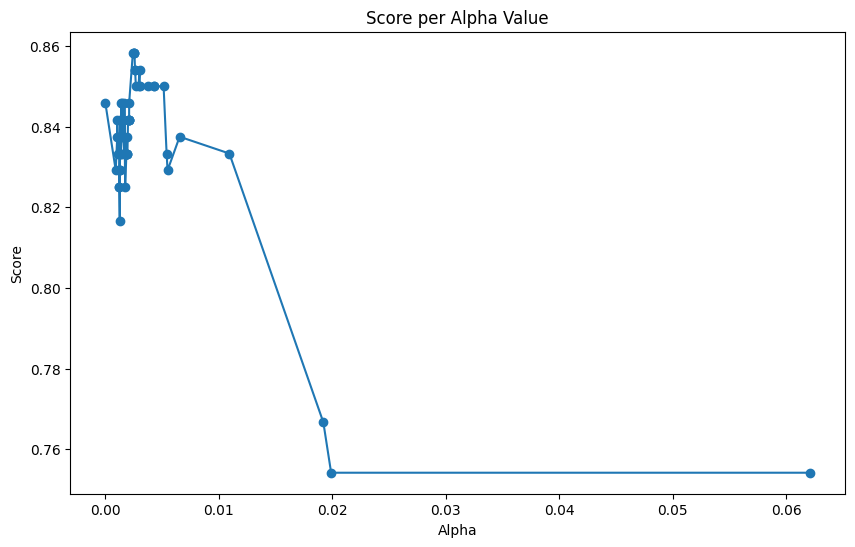

(0.0024226524645718267, 0.8583333333333333)


In [131]:
unpruned_tree = DecisionTreeClassifier(random_state=24) #without limits to max_depth

X_train, X_val, y_train, y_val = train_test_split(X , y, test_size = 0.2, random_state=24)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2 * X.shape[0]/X_train.shape[0],
                                                    random_state=24)

cost_path = unpruned_tree.cost_complexity_pruning_path(X_train, y_train)

subtrees = []
for alpha in cost_path.ccp_alphas:
    subtree = DecisionTreeClassifier(ccp_alpha=alpha)
    subtree.fit(X_train, y_train)
    subtrees.append(subtree)
    
subtree_scores = []
for tree in subtrees:
    score = tree.score(X_val, y_val)
    subtree_scores.append(score)
    
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Score')
ax.set_title('Score per Alpha Value')
ax.plot(cost_path.ccp_alphas, subtree_scores, marker='o')
plt.show()

alpha_scores = tuple(zip(cost_path.ccp_alphas, subtree_scores))
print(max(alpha_scores, key=lambda x:x[1])) # Getting the max score not the max alpha

We get the best score of 86% when the subtree alpha is 0.0024. So let's use this to calculate our metrics.

In [132]:
best_score_index = np.argmax(subtree_scores)
best_pruned_tree = subtrees[best_score_index]

test_score = best_pruned_tree.score(X_test, y_test)

print(f'Score on validation set: {round(subtree_scores[best_score_index], 2)}')
print(f'Score on test data: {round(test_score, 2)}')

Score on validation set: 0.86
Score on test data: 0.85


The best tree has an accuracy of 86% with the validation set and 85% with the testing set.

Let's have a look at how the best tree looks.

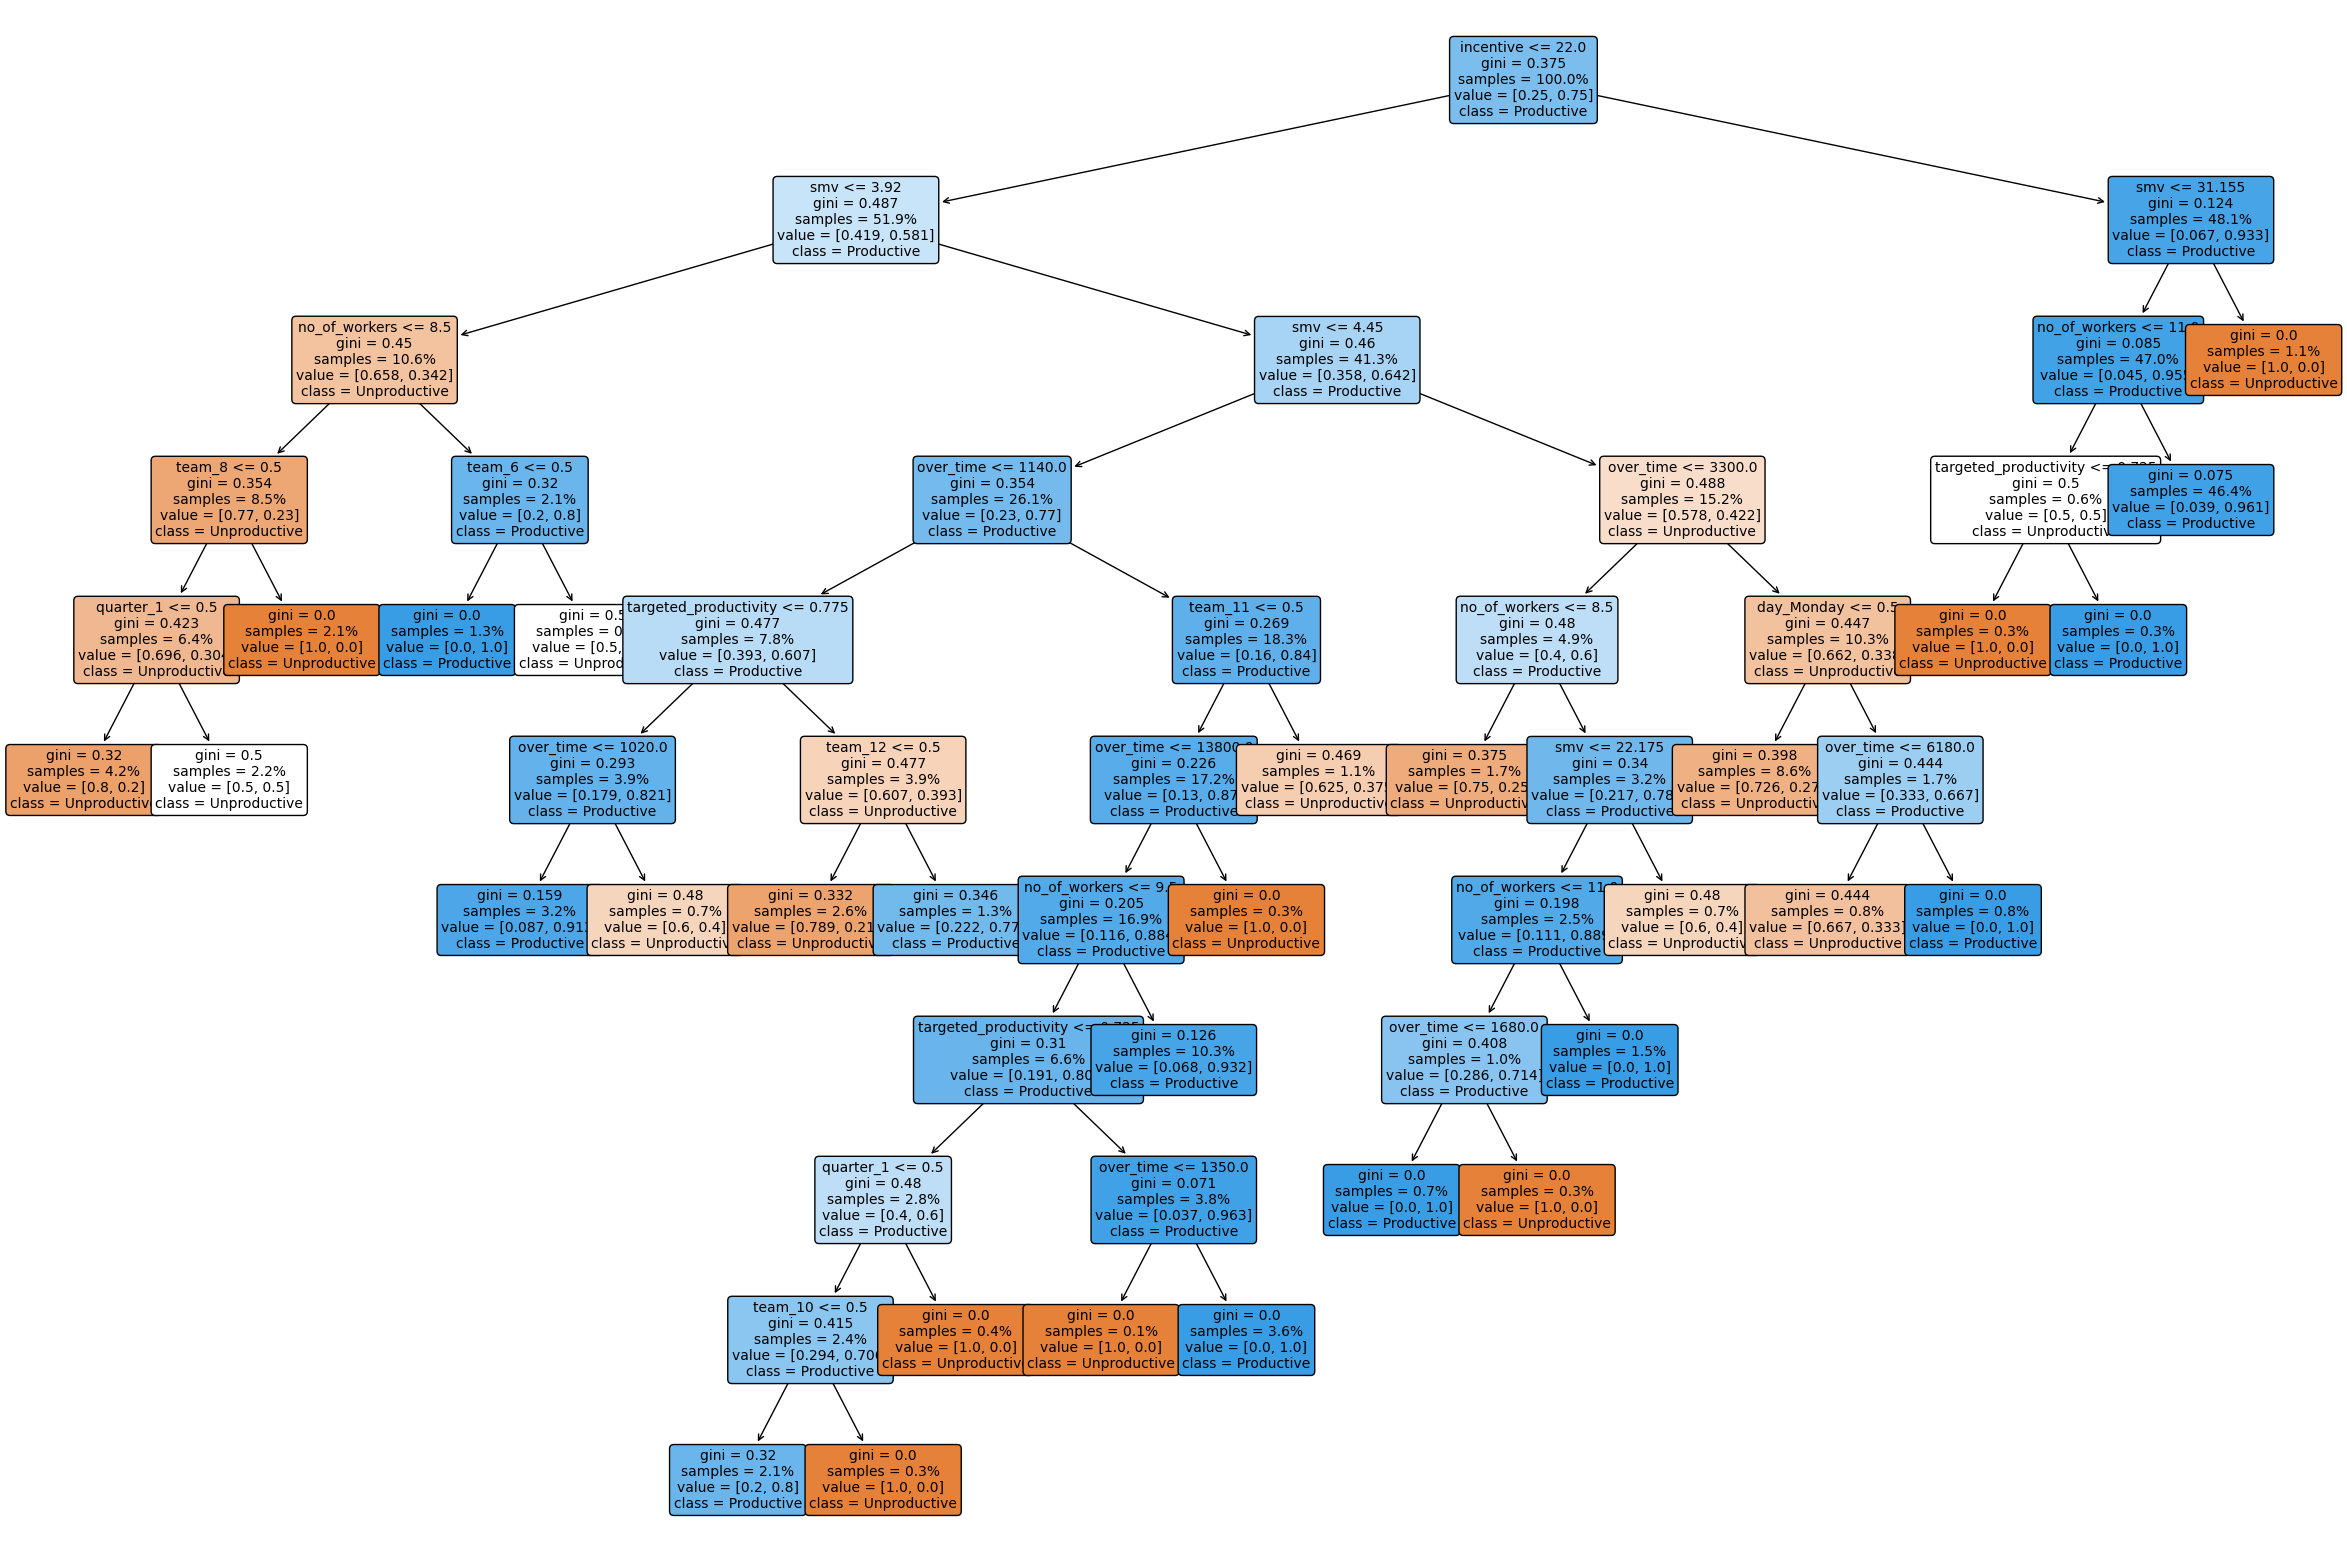

In [133]:
plt.figure(figsize=(30, 20))

plot_tree(best_pruned_tree, feature_names=X.columns, class_names=["Unproductive", "Productive"], filled=True, proportion=True,
          precision=3, rounded=True, fontsize=10)
plt.show()

Next, let's see if grid search optimization of hyperparameters can improve our model further.

#### Hyperparameter Optimization <a class='anchor' id='12'></a>

In [134]:
parameters = {'criterion':['gini', 'entropy'], 'class_weight':[None, 'balanced'], 'min_samples_split':[12, 30, 48],
              'max_depth':list(range(3, 7)), 'min_samples_leaf':list(range(9, 19, 3))}

tree = DecisionTreeClassifier()

grid_recall = GridSearchCV(tree, param_grid=parameters, scoring='accuracy', n_jobs=-1)

grid_recall.fit(X, y)

best_params = grid_recall.best_params_
best_estimator = grid_recall.best_estimator_
best_score = grid_recall.best_score_

print(best_params)
print(best_estimator)
print(best_score)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 12}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=12)
0.8169979079497909


It seems GridSearchCV did not find parameters that are better than what we have found via cost complexity pruning. Also take note that GridSearchCV is running on the entire dataset.

#### Random Forest Model <a class='anchor' id='13'></a>

Let's validate our results from our Classification Tree with a Random Forest Model.

In [135]:
forest = RandomForestClassifier(oob_score = True, random_state = 24)

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Accuracy: 0.85
Out Of Bag Score: 0.81


In [136]:
print('Classification Tree Scores')
print(f'Score on validation set: {round(subtree_scores[best_score_index], 2)}')
print(f'Score on test data: {round(test_score, 2)}')

Classification Tree Scores
Score on validation set: 0.86
Score on test data: 0.85


Our Random Forest Model scores are comparable to our classification tree model. Thus, we can be reassured that our tree model is not overtly overfitting the data.

#### Conclusion <a class='anchor' id='14'></a>

Our objective for this project was to create a model to predict employee productivity. To that end, our model was able to classify/predict employee productivity to 85% accuracy. 

From our classification tree model, we identified three predictors in the upper levels of our tree - incentive, time allocated to project, and number of workers - that played a bigger role predicting productivity. This is interesting as during our exploratory data analysis phase we noted that the correlation coefficient for these variables were insignificant. However, the correlation coefficient does assume a linear correlation.

Based on our model, we can recommend increasing incentive, and perhaps adjusting time allocated to projects and number of workers, in order to optimize productivity. 